In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin vers le fichier CSV
file_path = r'C:/Users/pc/Desktop/2017-05-12_6C-40per_3_6C_CH34.csv'

# Charger le dataset
df = pd.read_csv(file_path)
# Supprimer les colonnes non désirées
df = df.drop(columns=['Data_Point', 'DateTime', 'Step_Time', 'Step_Index'])

df



FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/pc/Desktop/2017-05-12_6C-40per_3_6C_CH34.csv'

In [ ]:

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

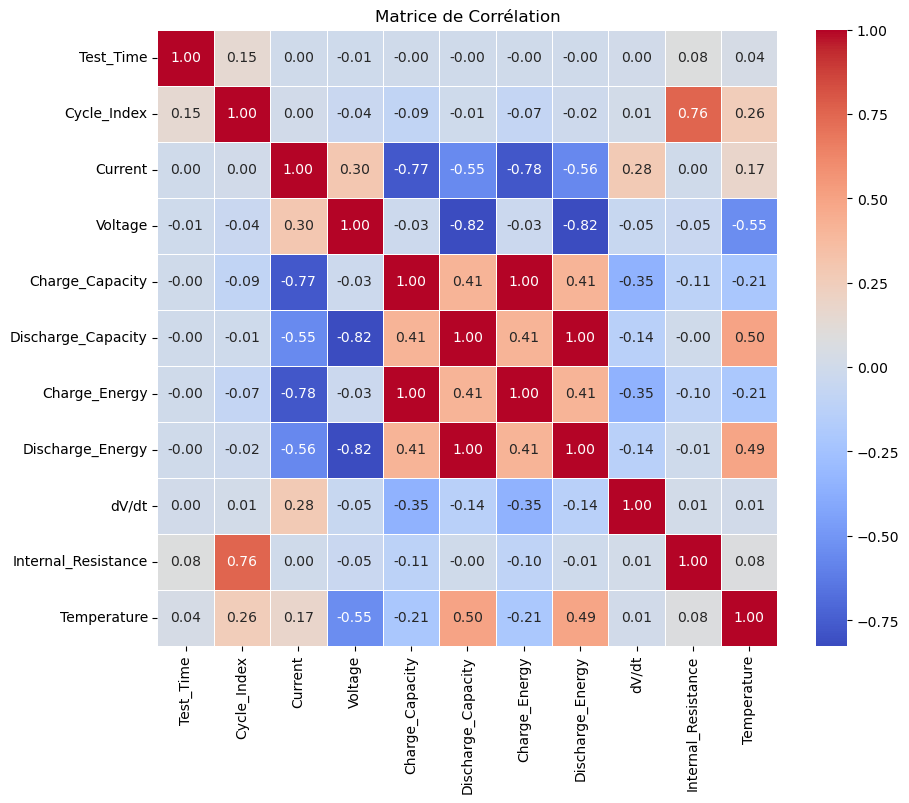

In [ ]:
# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

Matrice de corrélation moyenne :
                     Data_Point  Cycle_Index   Current   Voltage  \
Data_Point             1.000000     0.999765  0.028367 -0.006977   
Cycle_Index            0.999765     1.000000  0.029263 -0.006881   
Current                0.028367     0.029263  1.000000  0.342055   
Voltage               -0.006977    -0.006881  0.342055  1.000000   
Charge_Capacity       -0.101286    -0.102464 -0.720125 -0.044231   
Discharge_Capacity    -0.026102    -0.026805 -0.574111 -0.824364   
Charge_Energy         -0.092360    -0.093522 -0.722844 -0.046996   
Discharge_Energy      -0.031219    -0.031928 -0.583121 -0.818895   
dV/dt                  0.004071     0.004475  0.253038 -0.046010   
Internal_Resistance    0.594493     0.593189  0.015776  0.003942   
Temperature            0.114318     0.113665  0.023162 -0.449196   

                     Charge_Capacity  Discharge_Capacity  Charge_Energy  \
Data_Point                 -0.101286           -0.026102      -0.092360   


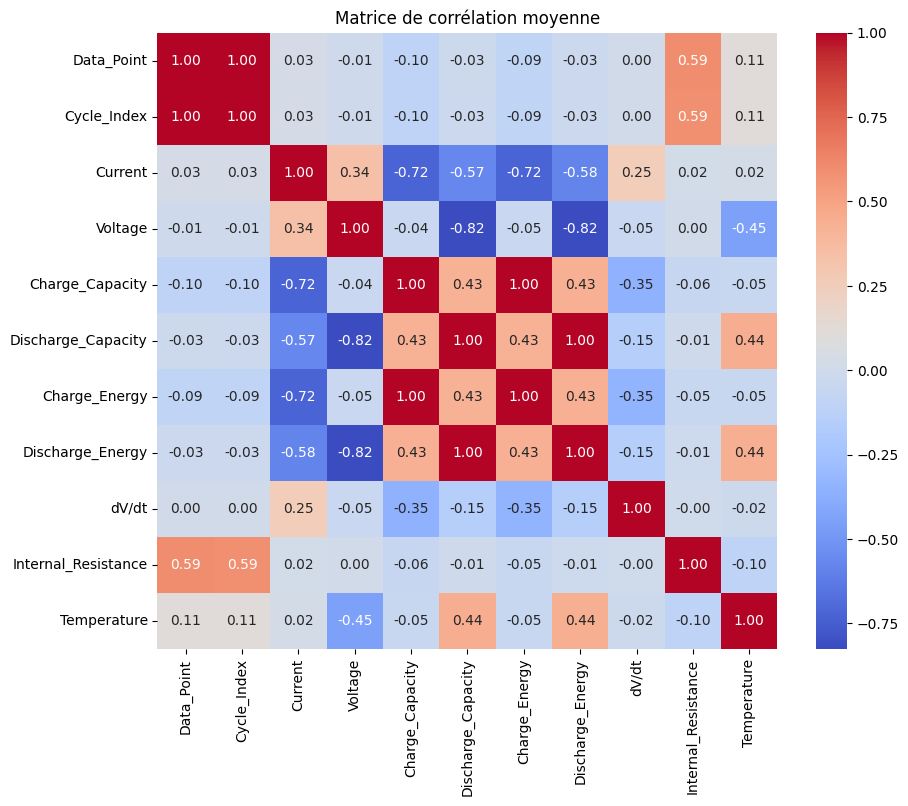

In [5]:
import os
import pandas as pd
import numpy as np

# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous les fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Initialiser une matrice cumulative avec des zéros
cumulative_correlation_matrix = None
n_files = len(csv_files)

# Parcourir chaque fichier CSV
for csv_file in csv_files:
    file_path = os.path.join(data_path, csv_file)
    
    # Lire le fichier CSV
    df = pd.read_csv(file_path)
    
    # Calculer la matrice de corrélation
    correlation_matrix = df.corr()
    
    # Ajouter la matrice de corrélation à la matrice cumulative
    if cumulative_correlation_matrix is None:
        cumulative_correlation_matrix = correlation_matrix
    else:
        cumulative_correlation_matrix += correlation_matrix

# Diviser la matrice cumulative par le nombre total de fichiers pour obtenir la moyenne
average_correlation_matrix = cumulative_correlation_matrix / n_files



# Optionnel : Afficher la matrice de corrélation moyenne sous forme de carte thermique (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(average_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation moyenne')
plt.show()
